In [248]:
import torch
import torch.nn as nn
import torch.optim as optim

In [9]:
from PIL import Image
import struct
import matplotlib.pyplot as plt

In [10]:
import os

def filter_files_by_extension(directory, extension):
    """
    Function to filter files by extension in a given directory.
    
    Parameters:
        directory (str): The directory to search for files.
        extension (str): The file extension to filter by.
        
    Returns:
        List[str]: List of file names with the specified extension.
    """
    filtered_files = []
    for filename in os.listdir(directory):
        if filename.endswith(extension):
            filtered_files.append(filename)
    return filtered_files

In [11]:
current_directory = os.getcwd()

In [12]:
images = filter_files_by_extension(current_directory, ".bin")

In [460]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_3d_array(array, title=None, inv=False, soft=False, th=0.5):
    """
    Visualize a 3D array of cubes.
    
    Parameters:
        array (list of lists of lists): 3D array containing values indicating cube colors.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Dimensions of the array
    depth = len(array)
    width = len(array[0])
    height = len(array[0][0])

    # Loop through the 3D array and create cubes based on the values
    for d in range(depth):
        for w in range(width):
            for h in range(height):
                if soft:
                    a = max(0, min(1, array[d][w][h].item()))
                    ax.bar3d(d, w, h, 1, 1, 1, color='b', alpha=0.05 + 0.9*a)
                else:
                    if (array[d][w][h] > th and inv==False) or (array[d][w][h] < th and inv==True):
                        ax.bar3d(d, w, h, 1, 1, 1, color='b', alpha=0.95)
                    else:
                        ax.bar3d(d, w, h, 1, 1, 1, color='w', alpha=0.01)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    ax.set_box_aspect([37,25,10])
    
    ax.set_title(title)

    plt.show()

In [262]:
import numpy as np

def make_3d_array(linear_array, W=37, D=25, H=10):
    result = np.zeros((W, D, H))
    c = 0
    for w in range(W):
        for d in range(D):
            for h in range(H):
                result[w, d, h] = linear_array[c]
                c+=1
    return result

X = []
y = []                

# Make twin dataset
for fn in sorted(images, key=lambda x: int(x.split('.')[0][:-1])):
    base = int(fn.split('.')[0][:-1])
    l_box = (80, 0, 1280, 720)
    r_box = (0, 0, 1280-80, 720)
    l_img = Image.open(f"{base}L.png").convert("RGB").crop(l_box).resize((224, 224))
    r_img = Image.open(f"{base}R.png").convert("RGB").crop(r_box).resize((224, 224))
    #37x25x10 methinks
    with open(fn, "rb") as file:
        binary_data = file.read()
        print(".")
        #print(struct.unpack('f', binary_data[0:4]))
        #print(struct.unpack('f', binary_data[4:8]))
        #print(struct.unpack('f', binary_data[8:12]))
        #print(struct.unpack('f', binary_data[12:16]))
        #print(struct.unpack('f', binary_data[16:20]))
        #print(struct.unpack('f', binary_data[20:24]))
        #print(struct.unpack('f', binary_data[24:28]))
        arr = make_3d_array(binary_data[28:])
        #visualize_3d_array(arr, "Occupancy grid (Ground Truth)")
        #print(len(binary_data[28:]))
        X.append((l_img, r_img))
        y.append(arr)
    if len(X) > 50:
        break

X = np.array(X)
y = np.array(y)
print(f"\n\nObtained {len(X)} twin-image datapoints")

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


Obtained 51 datapoints


In [542]:
X = []
y = []                

# Make 6 channel dataset
for fn in sorted(images, key=lambda x: int(x.split('.')[0][:-1])):
    base = int(fn.split('.')[0][:-1])
    l_box = (80, 0, 1280, 720)
    r_box = (0, 0, 1280-80, 720)
    l_img = Image.open(f"{base}L.png").convert("RGB").crop(l_box).resize((224, 224))
    r_img = Image.open(f"{base}R.png").convert("RGB").crop(r_box).resize((224, 224))
    #37x25x10 methinks
    with open(fn, "rb") as file:
        binary_data = file.read()
        print(".")
        arr = make_3d_array(binary_data[28:])
        X.append(np.concatenate([np.array(l_img), np.array(r_img)], axis=2))
        y.append(arr)
    if len(X) > 50:
        break

X = np.array(X)
y = np.array(y)
print(f"\n\nObtained {len(X)} 6-channel datapoints")

.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


Obtained 51 6-channel datapoints


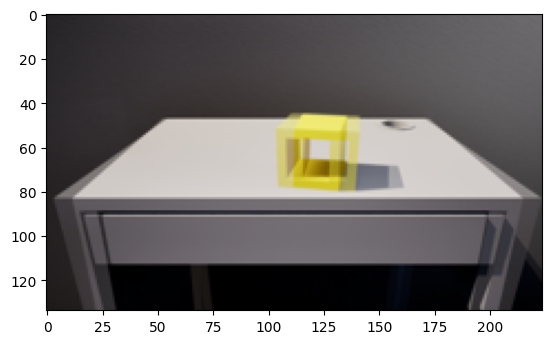

In [51]:
index = 32
plt.imshow(Image.blend(X[index][0], X[index][1], 0.5).resize((224, int(224/1.666))))

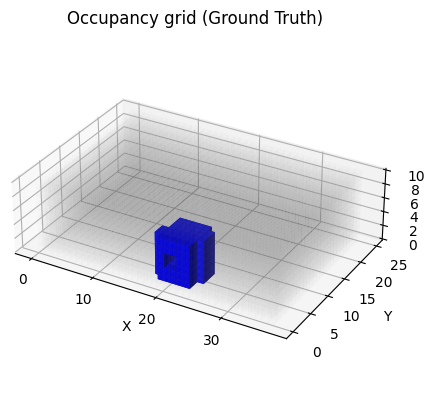

In [52]:
visualize_3d_array(y[index], "Occupancy grid (Ground Truth)")

In [54]:
!pip install vpython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.8/480.8 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 7.0 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 11.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 4.0 MB/s eta 0:00:00
  Created wheel for autobahn: filename=autobahn-23.6.2-cp311-cp311-macosx_13_0_arm64.whl size=671905 sha256=ab71891d950236f91583c6b7c212483650f2878cfb1d52f0200b84cb14e6f676
  Stored in directory: /Users/emiliopomares/Library/Caches/pip/wheels/2c/68/6a/d0d59a63751958c289282ac0f7d47ecdcbdf125cc385d83013
Successfully built autobahn


In [206]:
pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 6.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 4.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.2
    Uninstalling urllib3-1.26.2:
      Successfully uninstalled urllib3-1.26.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.28 requires requests>=2.31, but you have requests 2.29.0 which is incompatible.
tuya-bulb-control 0.1b3 requires requests==2.25.1, but you have requests 2.29.0 which is incompatible.
tuya-bulb-control 0.1b3 requires urllib3==1.26.2, but you have urllib3 1.26.18 which is incompatible.
Note: you may need to restart the

In [264]:
# Prepare twin torch.tensor data
Xt = torch.tensor(X).float().permute(0, 1, 4, 2, 3)/255
yt = torch.tensor(y).float()

In [544]:
# Prepare 6-channel torch.tensor data
Xt = torch.tensor(X).float().permute(0, 3, 1, 2)/255
yt = torch.tensor(y).float()

In [ ]:
# We are going to try:
# FCN 6 channel
# FCN twin head
# CNN 6 channel
# CNN twin head
# ViT

In [412]:
import torch
import torch.nn as nn

# Twin head FCN. Seems to be capable of at least overfitting a batch of training data
class FCN_twin(nn.Module):
    def __init__(self):
        super(FCN_twin, self).__init__()
        self.shared_conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=2)
        #self.shared_ln_1 = nn.LayerNorm(64)
        self.shared_conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=2)
        self.shared_conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=2)
        self.shared_conv4 = nn.Conv2d(256, 512, kernel_size=3, stride=2)
        self.shared_conv5 = nn.Conv2d(512, 1024, kernel_size=3, stride=2)
        
        # Adjusted transposed convolutional layers
        self.upconv1 = nn.ConvTranspose2d(1024*2, 512, kernel_size=(8, 2), stride=(2, 1))
        self.upconv2 = nn.ConvTranspose2d(512, 256, kernel_size=(4, 2), stride=(1, 1))
        self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=(3, 2), stride=(1, 1))
        self.upconv4 = nn.ConvTranspose2d(128, 37, kernel_size=(3, 2), stride=(1, 1))

    def forward(self, x):
        # Split the input tensor along the channel dimension
        image0, image1 = torch.split(x, 1, dim=1)
        image0 = torch.squeeze(image0, dim=1)
        image1 = torch.squeeze(image1, dim=1)
        
        # Apply the same shared convolutional layers to both images
        x0 = torch.relu(self.shared_conv1(image0))
        x0 = torch.relu(self.shared_conv2(x0))
        x0 = torch.relu(self.shared_conv3(x0))
        x0 = torch.relu(self.shared_conv4(x0))
        x0 = torch.relu(self.shared_conv5(x0))
        
        x1 = torch.relu(self.shared_conv1(image1))
        x1 = torch.relu(self.shared_conv2(x1))
        x1 = torch.relu(self.shared_conv3(x1))
        x1 = torch.relu(self.shared_conv4(x1))
        x1 = torch.relu(self.shared_conv5(x1))
    
        # Concatenate features from both images
        x = torch.cat((x0, x1), dim=1)
        #print(x.shape)
        
        x = torch.relu(self.upconv1(x))
        x = torch.relu(self.upconv2(x))
        x = torch.relu(self.upconv3(x))
        #x = #
        x = torch.sigmoid(self.upconv4(x))
        
        
        return x

model_1 = FCN_twin()

In [557]:
import torch
import torch.nn as nn

# 6 Channel FCN. Choose the one that converges faster
class FCN_6channels(nn.Module):
    def __init__(self):
        super(FCN_6channels, self).__init__()
        self.shared_conv1 = nn.Conv2d(6, 64, kernel_size=3, stride=2)
        self.shared_conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=2)
        self.shared_conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=2)
        self.shared_conv4 = nn.Conv2d(256, 512, kernel_size=3, stride=2)
        self.shared_conv5 = nn.Conv2d(512, 1024*2, kernel_size=3, stride=2)
        
        # Adjusted transposed convolutional layers
        self.upconv1 = nn.ConvTranspose2d(1024*2, 512, kernel_size=(8, 2), stride=(2, 1))
        self.upconv2 = nn.ConvTranspose2d(512, 256, kernel_size=(4, 2), stride=(1, 1))
        self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=(3, 2), stride=(1, 1))
        self.upconv4 = nn.ConvTranspose2d(128, 37, kernel_size=(3, 2), stride=(1, 1))

    def forward(self, x):
        x = torch.relu(self.shared_conv1(x))
        x = torch.relu(self.shared_conv2(x))
        x = torch.relu(self.shared_conv3(x))
        x = torch.relu(self.shared_conv4(x))
        x = torch.relu(self.shared_conv5(x))
        
        x = torch.relu(self.upconv1(x))
        x = torch.relu(self.upconv2(x))
        x = torch.relu(self.upconv3(x))
        #x = #
        x = torch.sigmoid(self.upconv4(x))
        
        return x

model_2 = FCN_6channels()

In [374]:
outputs = model_1.forward(Xt)
gt = yt

In [348]:
sum(p.numel() for p in model_1.parameters() if p.requires_grad)

24322341

In [221]:
outputs.shape

torch.Size([2, 37, 25, 10])

In [222]:
gt.shape

torch.Size([2, 37, 25, 10])

In [228]:
criterion = nn.CrossEntropyLoss(reduction='mean')

In [236]:
individual_losses = []
for i in range(outputs.size(1)):
    for j in range(outputs.size(2)):
        for k in range(outputs.size(3)):
            individual_losses.append(criterion(outputs[:, i, j, k], gt[:, i, j, k]))
            #individual_losses = torch.tensor([criterion(outputs[:, i], gt[:, i]) for i in range(outputs.size(1))])
            
individual_losses = torch.tensor(individual_losses)                                              
# Sum up the individual losses to get the final loss
loss = torch.sum(individual_losses)

In [246]:
criterion(outputs[:, 0, 0, 0], gt[:, 0, 0, 0])

tensor(-0., grad_fn=<DivBackward1>)

In [244]:
gt[0, 0, 0, 0]

tensor(0.)

In [229]:
criterion(outputs, gt)

tensor(2.8223, grad_fn=<DivBackward1>)

In [233]:
loss

tensor(270.3251)

In [234]:
outputs_flat = outputs.view(-1, outputs.size(1), outputs.size(2) * outputs.size(3))
gt_flat = gt.view(-1, gt.size(1), gt.size(2) * gt.size(3))

# Calculate individual cross-entropy losses for each classification task
individual_losses = criterion(outputs_flat, gt_flat)

# Sum up the individual losses to get the final loss
loss = torch.sum(individual_losses)

In [235]:
loss

tensor(2.8223, grad_fn=<SumBackward0>)

In [555]:
def train_model(model, X, y, criterion, optimizer, num_epochs=10, lr=0.0001):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        optimizer.zero_grad()

        outputs = model(X)

        #individual_losses = torch.zeros(37,25,10)
        #for i in range(outputs.size(1)):
        #    for j in range(outputs.size(2)):
        #        for k in range(outputs.size(3)):
        #            individual_losses[i,j,k] = criterion(outputs[:, i, j, k], y[:, i, j, k]) #criterion(outputs[:, i, j, k], y[:, i, j, k])
        #
        #loss = torch.sum(individual_losses)
        loss = criterion(outputs, y)
        print(loss)

        loss.backward()
        optimizer.step()

        #running_loss += loss.item()
        
        epoch_loss = loss.item() #running_loss / len(yt)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.8f}")


# Example usage:
# Assuming you have a train_loader with batches of input images and corresponding labels
# Also, assuming you have defined your FCN model, criterion (individual cross-entropy losses), and optimizer

# Initialize the model, criterion, and optimizer
criterion = nn.BCELoss(reduction='mean')  # Use reduction='mean' for averaging the losses


# Train the model


In [529]:
train_model(model_1, Xt, yt, criterion, optimizer, num_epochs=16)

tensor(0.0677, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [1/16], Loss: 0.06769688
tensor(0.0677, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [2/16], Loss: 0.06767292
tensor(0.0676, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [3/16], Loss: 0.06764899
tensor(0.0676, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [4/16], Loss: 0.06762508
tensor(0.0676, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [5/16], Loss: 0.06760110
tensor(0.0676, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [6/16], Loss: 0.06757713
tensor(0.0676, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [7/16], Loss: 0.06755316
tensor(0.0675, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [8/16], Loss: 0.06752928
tensor(0.0675, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [9/16], Loss: 0.06750533
tensor(0.0675, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [10/16], Loss: 0.06748132
tensor(0.0675, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [11/16], Loss: 0.06745721
tensor(0.0674, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [12

In [588]:
train_model(model_2, Xt, yt, criterion, optimizer, num_epochs=16, lr=0.00002)

tensor(0.0654, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [1/16], Loss: 0.06544761
tensor(0.0656, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [2/16], Loss: 0.06559855
tensor(0.0654, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [3/16], Loss: 0.06542356
tensor(0.0651, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [4/16], Loss: 0.06510435
tensor(0.0651, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [5/16], Loss: 0.06510055
tensor(0.0650, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [6/16], Loss: 0.06504181
tensor(0.0649, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [7/16], Loss: 0.06485181
tensor(0.0648, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [8/16], Loss: 0.06478062
tensor(0.0648, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [9/16], Loss: 0.06475839
tensor(0.0646, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [10/16], Loss: 0.06463391
tensor(0.0645, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [11/16], Loss: 0.06454690
tensor(0.0645, grad_fn=<BinaryCrossEntropyBackward0>)
Epoch [12

tensor(1.)

In [551]:
model_2(Xt[0:1])

torch.Size([1, 6, 224, 224])
torch.Size([1, 64, 111, 111])
torch.Size([1, 128, 55, 55])
torch.Size([1, 256, 27, 27])
torch.Size([1, 512, 13, 13])
torch.Size([1, 2048, 6, 6])
torch.Size([1, 512, 18, 7])
torch.Size([1, 256, 21, 8])
torch.Size([1, 128, 23, 9])
torch.Size([1, 37, 25, 10])


tensor([[[[0.4961, 0.4976, 0.4973,  ..., 0.4973, 0.4974, 0.4974],
          [0.4939, 0.4969, 0.4971,  ..., 0.4973, 0.4978, 0.4990],
          [0.4931, 0.4940, 0.4942,  ..., 0.4942, 0.4946, 0.4959],
          ...,
          [0.4934, 0.4935, 0.4930,  ..., 0.4928, 0.4931, 0.4953],
          [0.4932, 0.4908, 0.4904,  ..., 0.4904, 0.4908, 0.4940],
          [0.4955, 0.4924, 0.4921,  ..., 0.4922, 0.4919, 0.4930]],

         [[0.5001, 0.5000, 0.5001,  ..., 0.5001, 0.5002, 0.5000],
          [0.5007, 0.4991, 0.4991,  ..., 0.4991, 0.4995, 0.4988],
          [0.5011, 0.4960, 0.4967,  ..., 0.4968, 0.4971, 0.4955],
          ...,
          [0.5018, 0.4985, 0.4978,  ..., 0.4976, 0.4972, 0.4946],
          [0.5015, 0.4977, 0.4969,  ..., 0.4968, 0.4967, 0.4943],
          [0.5002, 0.4964, 0.4960,  ..., 0.4960, 0.4963, 0.4958]],

         [[0.5137, 0.5133, 0.5131,  ..., 0.5131, 0.5132, 0.5112],
          [0.5118, 0.5121, 0.5122,  ..., 0.5122, 0.5123, 0.5125],
          [0.5076, 0.5063, 0.5055,  ..., 0

In [271]:
individual_losses = torch.zeros(37,25,10)

In [272]:
Xt.shape

torch.Size([51, 2, 3, 224, 224])

In [273]:
yt.shape

torch.Size([51, 37, 25, 10])

In [269]:
Xt.size(0)

51

In [286]:
model_1.eval()

FCN_twin(
  (shared_conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2))
  (shared_conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (shared_conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2))
  (shared_conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2))
  (shared_conv5): Conv2d(512, 1024, kernel_size=(3, 3), stride=(2, 2))
  (upconv1): ConvTranspose2d(2048, 512, kernel_size=(8, 2), stride=(2, 1))
  (upconv2): ConvTranspose2d(512, 256, kernel_size=(4, 2), stride=(1, 1))
  (upconv3): ConvTranspose2d(256, 128, kernel_size=(3, 2), stride=(1, 1))
  (upconv4): ConvTranspose2d(128, 37, kernel_size=(3, 2), stride=(1, 1))
)

In [289]:
torch.sum(torch.sigmoid(model_1(Xt[0:1])) - yt[0:1])

tensor(8154.7686, grad_fn=<SumBackward0>)

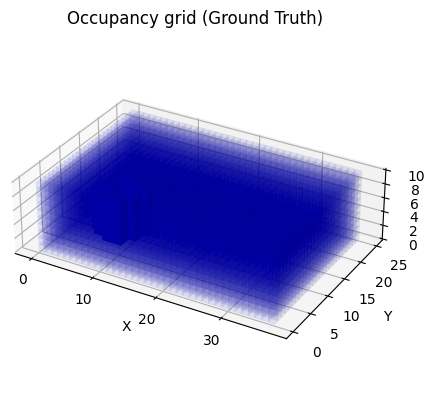

In [423]:
index = 0
visualize_3d_array(yt[index], "Occupancy grid (Ground Truth)", soft=True)

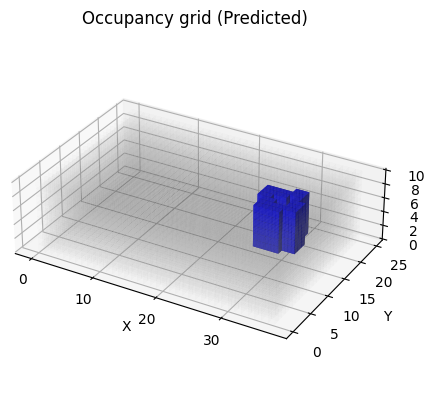

In [593]:
index=4
visualize_3d_array(yt[index:index+1][0], "Occupancy grid (Predicted)")

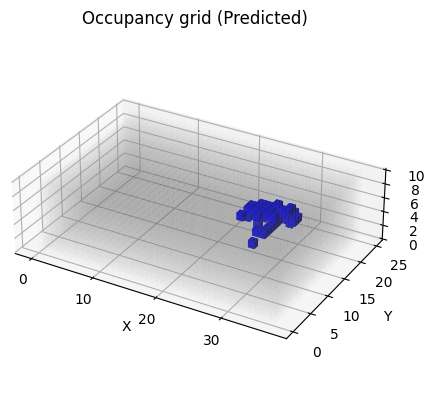

In [594]:
index=4
m = torch.max(model_2(Xt[index:index+1])[0]).item()
visualize_3d_array(model_2(Xt[index:index+1])[0]/m, "Occupancy grid (Predicted)", soft=False, th=0.5)

In [343]:
criterion(torch.tensor([-0.5]), torch.tensor([1.0]))

tensor(-0.)

In [344]:
nn.CrossEntropyLoss()(torch.tensor([-0.5]), torch.tensor([1.0]))

tensor(-0.)

In [329]:
import math

def binary_cross_entropy(logit, ground_truth):
    """
    Calculate binary cross-entropy loss.

    Args:
        logit (float): The logit (predicted probability) for the positive class.
        ground_truth (int): The ground truth label (0 or 1).

    Returns:
        float: Binary cross-entropy loss.
    """
    if ground_truth == 1:
        return -math.log(logit)
    elif ground_truth == 0:
        return -math.log(1 - logit)
    else:
        raise ValueError("Ground truth must be 0 or 1.")

In [336]:
binary_cross_entropy(45, 1.0)

-3.8066624897703196

In [589]:
torch.max(model_2(Xt[0:1]))

tensor(0.7865, grad_fn=<MaxBackward1>)

In [436]:
torch.max(model_1(Xt[0:1])[0]/0.1730)

tensor(0.9997, grad_fn=<MaxBackward1>)

In [356]:
nn.MSELoss()(torch.tensor([-1.0, -0.0, -1.0]), torch.tensor([0.0, 0.0, 0.0]))

tensor(0.6667)

In [372]:
nn.BCELoss(reduction='mean')(torch.tensor([1.1]), torch.tensor([1.0]))

RuntimeError: all elements of input should be between 0 and 1

In [510]:
individual_losses = torch.zeros(37,25,10)
outputs = model_1(Xt[0:1])
gt = yt[0:1]
for i in range(outputs.size(1)):
    for j in range(outputs.size(2)):
        for k in range(outputs.size(3)):
            individual_losses[i,j,k] = criterion(outputs[:, i, j, k], gt[:, i, j, k]) #criterion(outputs[:, i, j, k], y[:, i, j, k])
#            #individual_losses = torch.tensor([criterion(outputs[:, i], gt[:, i]) for i in range(outputs.size(1))])

In [511]:
torch.mean(individual_losses)

tensor(0.0654, grad_fn=<MeanBackward0>)

In [512]:
criterion(outputs, gt)

tensor(0.0654, grad_fn=<BinaryCrossEntropyBackward0>)

In [482]:
criterion(outputs, gt)

tensor(0.0654, grad_fn=<BinaryCrossEntropyBackward0>)

In [483]:
outputs.shape

torch.Size([1, 37, 25, 10])

In [484]:
gt.shape

torch.Size([1, 37, 25, 10])

In [501]:
criterion(torch.tensor([[0.75, 0.85], [0.86, 0.75]]), torch.tensor([[1.0, 1.0], [0.0, 1.0]]))

tensor(0.6760)

In [504]:
criterion(torch.tensor([0.75]), torch.tensor([1.0]))

tensor(0.2877)

In [505]:
criterion(torch.tensor([0.85]), torch.tensor([1.0]))

tensor(0.1625)

In [506]:
criterion(torch.tensor([0.86]), torch.tensor([0.0]))

tensor(1.9661)

In [507]:
criterion(torch.tensor([0.75]), torch.tensor([1.0]))

tensor(0.2877)

In [509]:
(0.2877+0.1625+1.9661+0.2877)/4

0.676